In [20]:
from typing import TypedDict
from langgraph.graph import StateGraph,START, END

In [21]:
class FactoryState(TypedDict):
    # Strict typing for our data
    count: int
    message: str
                 

In [22]:
def worker_node(state:FactoryState):
    print("Working...")
    # Return a dictionary update
    return {"count": state['count'] + 1}

In [23]:
workflow = StateGraph(FactoryState)


# Add Nodes
workflow.add_node("step_1", worker_node)





In [24]:
workflow.add_edge(START, "step_1")

workflow.add_edge("step_1", END)    

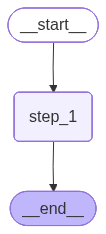

In [25]:
from IPython.display import Image, display

# Compile freezes the structure
app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [26]:
# Invoke starts the conveyor belt
initial_state={"count": 10}
result = app.invoke(initial_state)

Working...


In [27]:
print("Final Result:", result)

Final Result: {'count': 11}
